## Mownit laboratorium 2
### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji 0.14 : https://juliadata.github.io/DataFrames.jl/stable/index.html





In [2]:
using Pkg
Pkg.add("DataFrames")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [=======>                                 ]  15.0 %Fetching: [=========>                               ]  22.1 %Fetching: [=============>                           ]  31.4 %Fetching: [========================>                ]  58.5 % Resolving package versions...
 Installed Tables ────────────────────── v0.1.9
 Installed TableTraits ───────────────── v0.3.1
 Installed IteratorInterfaceExtensions ─ v0.1.1
 Installed DataStreams ───────────────── v0.4.1
 Installed BinaryProvider ────────────── v0.5.2
 Installed TranscodingStreams ────────── v0.8.1
 Installed CategoricalArrays ─────────── v0.4.0
 Installed DataFrames ────────────────── v0.14.1
 Installed CodecZlib ─────────────────── v0.5.0
 Installed WeakRefStrings ────────────── v0.5.3
  Updating `~/.julia/environments/v1.0/Project.toml`
  [

In [11]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [4,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
│     │ Int64       │ Float64 │ Bool  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 4.0     │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [12]:
typeof(df1[:Col2])

Array{Float64,1}

In [13]:
typeof(df1[:Col3])

Array{Bool,1}

In [14]:
df1[:Col3]

4-element Array{Bool,1}:
  true
 false
  true
 false

In [8]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true
7,7,3.14159,true
8,8,1.41421,false
9,9,3.0,true


In [9]:
# ilosc wierszy
size(df2, 1) 

10

In [10]:
#ilosc kolumn
size(df2, 2) 

3

In [11]:
# można odwoływać się po indeksie
show(df2[2])

[2.0, 3.14159, 1.41421, 3.0, 4.0, 2.0, 3.14159, 1.41421, 3.0, 4.0]

In [8]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.0, 3.14159, 1.41421, 3.0, 4.0, 2.0, 3.14159, 1.41421, 3.0, 4.0]

In [9]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
│     │ Int64       │ Float64 │ Bool  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [16]:
# drugi i trzeci wiersz
df2[2:3, 1:3]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,true
2,3,1.41421,false


In [11]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.141592653589793 
 1.4142135623730951

In [12]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,true
2,1.41421,false


In [13]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true


In [14]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,false
2,6,2.0,true
3,7,3.14159,true
4,8,1.41421,false
5,9,3.0,true
6,10,4.0,false


In [15]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [16]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [17]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,MojaKolumna,5.5,1,5.5,10,,,Int64
2,Col2,2.71116,1.41421,3.0,4.0,,,Float64
3,Col3,0.6,false,1.0,true,,,Bool


In [18]:
using Statistics
mean(df2[:Col2])

2.711161243192578

In [18]:
var(df2[:Col2])

UndefVarError: UndefVarError: var not defined

In [19]:
Pkg.add("CSV")

 Resolving package versions...
 Installed Parsers ─ v0.2.8
 Installed CSV ───── v0.4.1
  Updating `~/.julia/environments/v1.0/Project.toml`
  [336ed68f] + CSV v0.4.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [336ed68f] + CSV v0.4.1
  [69de0a69] + Parsers v0.2.8
  [9abbd945] + Profile 


In [15]:
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";")
show(mydata)

1599×12 DataFrame. Omitted printing of 8 columns
│ Row  │ fixed acidity │ volatile acidity │ citric acid │ residual sugar │
│      │ Float64⍰      │ Float64⍰         │ Float64⍰    │ Float64⍰       │
├──────┼───────────────┼──────────────────┼─────────────┼────────────────┤
│ 1    │ 7.4           │ 0.7              │ 0.0         │ 1.9            │
│ 2    │ 7.8           │ 0.88             │ 0.0         │ 2.6            │
│ 3    │ 7.8           │ 0.76             │ 0.04        │ 2.3            │
│ 4    │ 11.2          │ 0.28             │ 0.56        │ 1.9            │
│ 5    │ 7.4           │ 0.7              │ 0.0         │ 1.9            │
│ 6    │ 7.4           │ 0.66             │ 0.0         │ 1.8            │
│ 7    │ 7.9           │ 0.6              │ 0.06        │ 1.6            │
⋮
│ 1592 │ 5.4           │ 0.74             │ 0.09        │ 1.7            │
│ 1593 │ 6.3           │ 0.51             │ 0.13        │ 2.3            │
│ 1594 │ 6.8           │ 0.62             │ 0.08 

In [16]:
typeof(mydata[:quality])

Array{Union{Missing, Int64},1}

In [23]:
size(mydata)

(1599, 12)

In [25]:
# grupowanie wierszy (tutaj po jakości (quality))
# ostatni argument to funkcja albo wyrażenie 
#https://juliadata.github.io/DataFrames.jl/stable/man/split_apply_combine.html
# przyklad: zliczanie ilosci win pogrupowanych po jakości
wine_grouped=by(mydata, :quality, df->size(df,1))

,quality,x1
,Int64⍰,Int64
1,5,681
2,6,638
3,7,199
4,4,53
5,8,18
6,3,10


In [27]:
#zaawansowane dzialanie na podgrupach
df2=by(mydata, [:quality, :alcohol]) do mySubGroup
          DataFrame(size = size(mySubGroup,1))
        end
sort(df2, [:quality, :alcohol])

,quality,alcohol,size
,Int64⍰,Float64⍰,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [28]:
# zapis do pliku
# https://juliadata.github.io/DataFrames.jl/stable/man/getting_started.html#Importing-and-Exporting-Data-(I/O)-1
CSV.write("dataframe1.csv", mydata)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest dodatkowy pakiet do pakietu Plots 

```julia
Pkg.add("StatPlots")
```
https://github.com/JuliaPlots/StatPlots.jl

Niestety Juliabox (chwilowo) nie pozwala na zainstalowanie dowolnych pakietow.

In [9]:
using DataFrames
DataFrame(dzialanie = ["macierz", "wektor", "macierz", "wektor", "wektor"], wysokoscA = [1, 2, 3, 4, 5], szerokoscA = [4, 4, 5, 6, 6],
    wysokoscB = [0, 0, 0, 0, 0], szerokoscB = 1, czas = [0.4, 5.1, 1234., -20, NaN])


,dzialanie,wysokoscA,szerokoscA,wysokoscB,szerokoscB,czas
,String,Int64,Int64,Int64,Int64,Float64
1,macierz,1,4,0,1,0.4
2,wektor,2,4,0,1,5.1
3,macierz,3,5,0,1,1234.0
4,wektor,4,6,0,1,-20.0
5,wektor,5,6,0,1,NaN


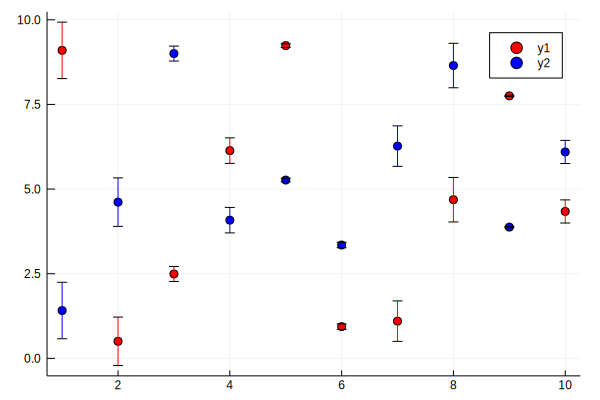

In [30]:
# zamiast makra @df z pakietu StatPlots mozna odwolywac sie bezposrednio do kolumn (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})
using Plots
scatter(df[:a], [df[:b], df[:c]], colour = [:red :blue], yerr=df[:d])


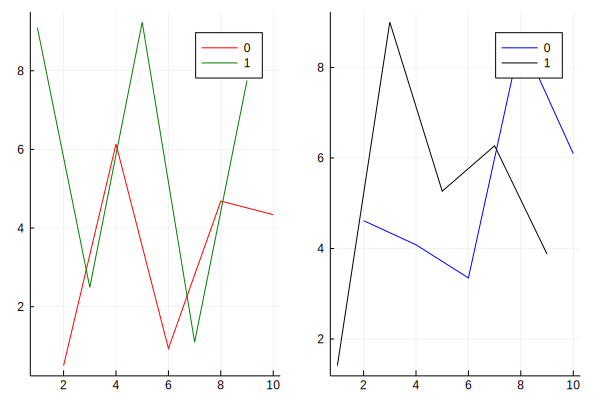

In [31]:
plot(df[:a], [df[:b], df[:c]], group=df[:e], colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku C używającego  interfejsu GSL do BLAS:<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_ddot"> funkcji gsl_blas_ddot </a> (mnożenie dwóch wektorów) i 
<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_dgemv">gsl_blas_dgemv</a> (mnożenie macierzy przez wektor). <a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#examples"> Przykłady użycia.</a>
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy  w tabalke za pomoca  opcji layout
- Należy zadbać o staranne podpisanie osi i wykresów.